In [2]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

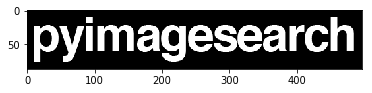

In [8]:
file ="/mnt/c/cnn_dl/morph_pyimagesearch_logo.png"
image = cv2.imread(file)

plt.imshow( image )

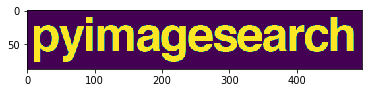

In [9]:
gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
plt.imshow( gray )

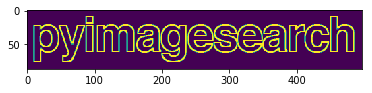

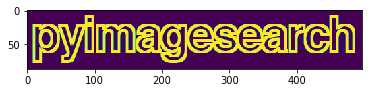

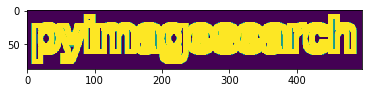

In [10]:

kernelSizes = [(3, 3), (5, 5), (9, 9)]

for kernelsize in kernelSizes:
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, kernelsize )
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel )
    plt.figure()
    plt.imshow(gradient) # observation: outline is clearly revealed;

**Top Hat/White Hat** is the difference between the original ( grayscale/single channel ) input image and the *opening*. <br>
A top hat operation is used to bright regions of an image on dark backgrounds.<br>
Usage: detect the license plate from the car.



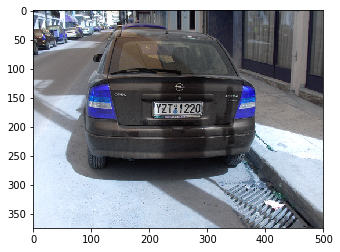

In [27]:

file ="/mnt/c/cnn_dl/data/morph_car.png"
image = cv2.imread(file)

gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )

#construct the rectangle kernels and apply a blackhap operation which eanbles us to find dark regions
# on a light background;

rectKernel = cv2.getStructuringElement( cv2.MORPH_RECT, (13,5 ))
blackhat = cv2.morphologyEx( gray, cv2.MORPH_BLACKHAT, rectKernel )

#similarly whitehat applied
tophat = cv2.morphologyEx( gray, cv2.MORPH_TOPHAT, rectKernel )

plt.imshow( image ) 


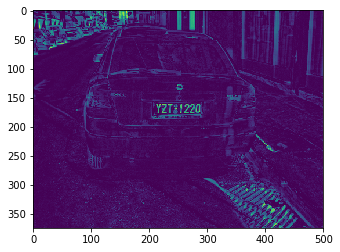

In [28]:
plt.imshow( blackhat )


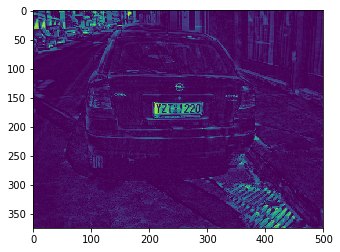

In [29]:
plt.imshow( tophat )

Conclusion: Uses of Morphological operations in OCR, automatic number plate recognition, and barcode detection.

#### Smoothing and blurring <br>
Lose details at the sharper regions. <br>
Goal is to use low-pass filter to reduce the amount of noise and detail in an image. It means each pixel in the image is mixed with its surrounding pixel intensities. This will becomes blurred pixels.<br>
for example, mobile document scanner, distance from an object to our camera. In both cases smaller details are smoothed out and left with more of the structural aspects of the image.<br>

<br>
Before smoothing apply techniques such as edge detection or thresholding. so that, can reduce the noise and edges. <br>

Options for smoothing and blurring: averaging, Gaussian blurring, median filtering, and bilateral filtering. <br>
<br>
Averaging: Which takes an area of pixels surrounding a central pixel, averages all these pixels together and replaces the central pixel with the average. <br>

functions: <br>
**cv2.blur**

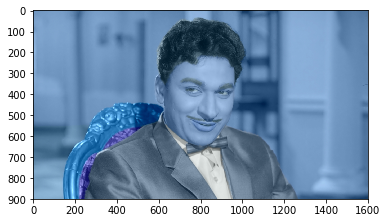

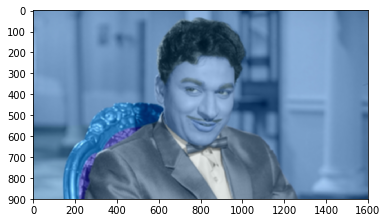

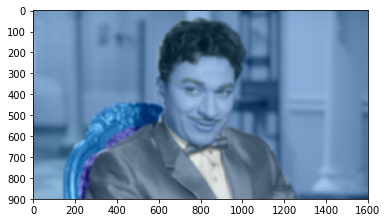

In [3]:
file ="/mnt/c/cnn_dl/drraj.jpg"
image = cv2.imread(file)

kernelSizes = [ (3,3), (9,9), (15,15) ]

for (kX, kY) in kernelSizes:
    blurred = cv2.blur(image, (kX,kY))
    plt.figure()
    plt.imshow(blurred)

**Gaussian blurrinng** similar to avg blurring. But instead of taking mean. using weighted mean, where 
neighborhood pixles that are closer to the central pixel contribute more "weight" to the average. <br>

Usage: remove the noise. <br>
Result: less blurred. But more naturally blurred that the avg. method.<br>

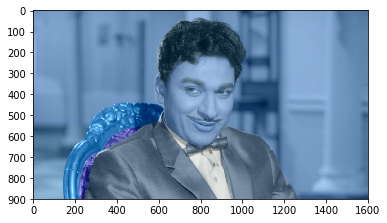

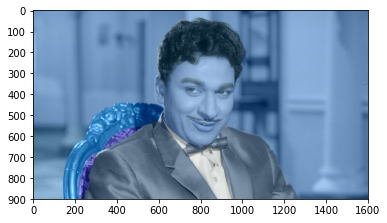

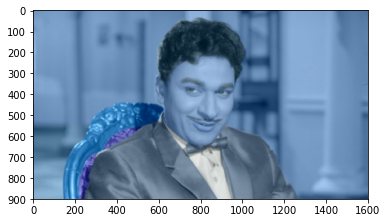

In [34]:
cv2.destroyAllWindows()

for (kX,kY) in kernelSizes:
    blurred = cv2.GaussianBlur(image, (kX,kY), 0)
    plt.figure()
    plt.imshow(blurred)

#### Median <br>
used to removing salt-and-pepper noise.

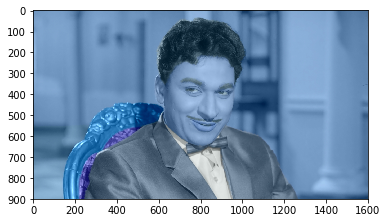

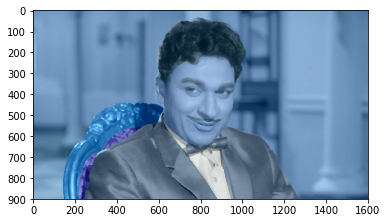

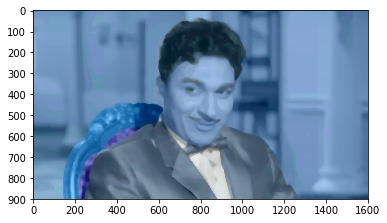

In [37]:
cv2.destroyAllWindows()

for k in (3,9,17):
    blurred = cv2.medianBlur(image,k)
    plt.figure()
    plt.imshow(blurred)

#### Bilateral <br>
Goal of blurring methods to reduce noise and detail in an image;<br>
Drawbacks: to lose edges in the image. <br>
when to use: still mainting edges in the image.<br>
It used two Gaussian distributions. first, gaussian function considers spatial neighbors. Second, gaussian models the pixels intensity of the neighborhood. <br>
<br>
functions: cv2.bilaterFilter(image, diameter, sigmacolor, sigmaspace ) <br>



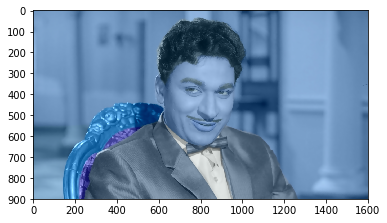

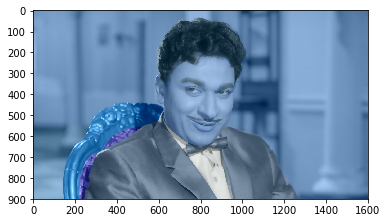

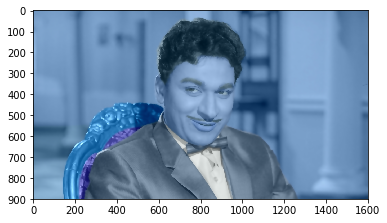

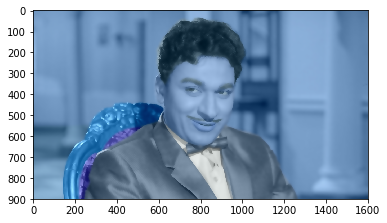

In [6]:
params = [ (11,21,7), (11,41,21), (11,61,39), (16, 78, 49)]

#loop over the diameter, sigma color and sigma space
for (diameter, sigma_color,sigma_space) in params:
    blurred = cv2.bilateralFilter( image, diameter, sigma_color, sigma_space )
    plt.figure()
    plt.imshow(blurred)